<a href="https://colab.research.google.com/github/AyushAgarwalGithub/html-portfolio/blob/main/catvsdog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d tongpython/cat-and-dog

100% 217M/218M [00:05<00:00, 45.1MB/s]
100% 218M/218M [00:05<00:00, 38.6MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/cat-and-dog.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from keras.preprocessing.image import ImageDataGenerator

In [5]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

train_set = train_datagen.flow_from_directory(
        '/content/training_set/training_set',
        target_size=(256,256),
        batch_size=32,
        class_mode='binary')

Found 8005 images belonging to 2 classes.


In [6]:
test_datagen = ImageDataGenerator(rescale=1./255)


test_set = test_datagen.flow_from_directory(
    '/content/test_set/test_set',
    target_size = (256,256),
    batch_size = 32,
    class_mode = 'binary')

Found 2023 images belonging to 2 classes.


In [7]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,))

model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [8]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [9]:
fit = model.fit(train_set,epochs=20,validation_data=test_set)

Epoch 1/20
251/251 [==============================] - 154s 571ms/step - loss: 1.8949 - accuracy: 0.5522 - val_loss: 1.1081 - val_accuracy: 0.5106
Epoch 2/20
251/251 [==============================] - 141s 560ms/step - loss: 0.6926 - accuracy: 0.5686 - val_loss: 0.6802 - val_accuracy: 0.6006
Epoch 3/20
251/251 [==============================] - 146s 583ms/step - loss: 0.6596 - accuracy: 0.6235 - val_loss: 0.6119 - val_accuracy: 0.6644
Epoch 4/20
251/251 [==============================] - 142s 565ms/step - loss: 0.6264 - accuracy: 0.6486 - val_loss: 0.7530 - val_accuracy: 0.6095
Epoch 5/20
251/251 [==============================] - 142s 565ms/step - loss: 0.6111 - accuracy: 0.6823 - val_loss: 0.6444 - val_accuracy: 0.7014
Epoch 6/20
251/251 [==============================] - 141s 561ms/step - loss: 0.6137 - accuracy: 0.6733 - val_loss: 0.9872 - val_accuracy: 0.5344
Epoch 7/20
251/251 [==============================] - 141s 560ms/step - loss: 0.6275 - accuracy: 0.6706 - val_loss: 0.8115 -

In [49]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from keras.utils import load_img,img_to_array
def finder(address_of_img:str)->bool:
  test_img=load_img(address_of_img,target_size=(256,256))
  test_img=img_to_array(test_img)
  test_img=np.expand_dims(test_img,axis=0)
  result=model.predict(test_img)
  train_set.class_indices
  return('Dog' if result else 'Cat')

1/1 [==============================] - 0s 34ms/step


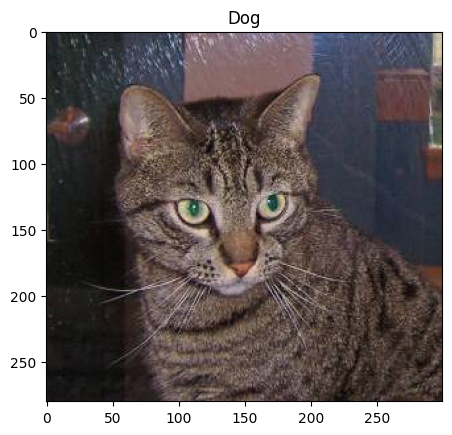

In [61]:

image_path='/content/cat test3.jpg'
img = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


plt.imshow(img_rgb)
plt.title(finder(image_path))
plt.show()

1/1 [==============================] - 0s 19ms/step


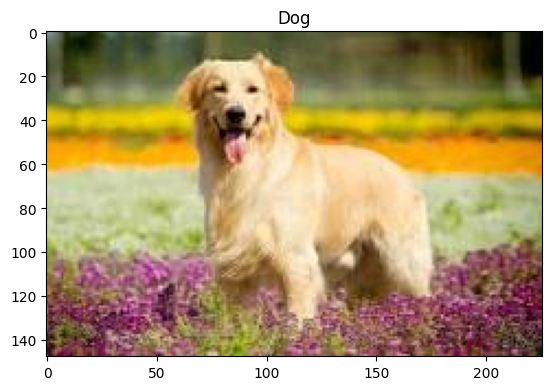

In [58]:

image_path='/content/dog test.jpg'
img = cv2.imread(image_path)

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


plt.imshow(img_rgb)
plt.title(finder(image_path))
plt.show()

1/1 [==============================] - 0s 29ms/step


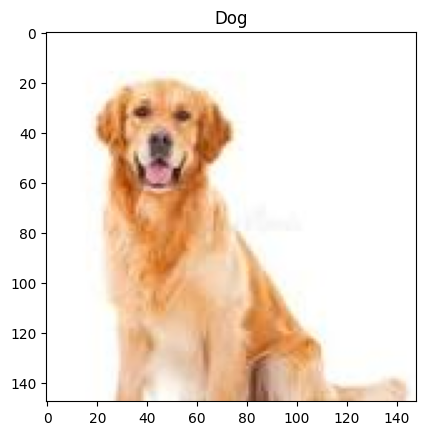

In [52]:

image_path='/content/dog test2.jpg'
img = cv2.imread(image_path)

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


plt.imshow(img_rgb)
plt.title(finder(image_path))
plt.show()